In [150]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score

In [151]:
# train and test data
train_data=pd.read_csv(r'C:\Users\User\Desktop\ms\Machine Learning for Banking\train_fNxu4vz.csv')
test_data=pd.read_csv(r'C:\Users\User\Desktop\ms\Machine Learning for Banking\test_fjtUOL8.csv')

2    70580
3    59923
1    33806
Name: Interest_Rate, dtype: int64

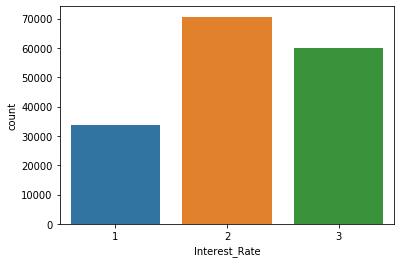

In [152]:
# checkig the Interest_Rate distribution
sns.countplot(train_data['Interest_Rate'])

train_data['Interest_Rate'].value_counts()

In [153]:
# convert Loan_Amount_Requested column into number
new =train_data['Loan_Amount_Requested'].str.split(",", n = 1, expand = True)
new=pd.DataFrame(new)
data1=new[0]+new[1]
prob_index=new[new[1].isnull()].index.tolist()
replace_value=[500,725,900,500,500,950,800,750]

for i in range(0,len(prob_index)):
    data1.loc[prob_index[i]]=data1.loc[replace_value[i]]
    
train_data['Loan_Amount_Requested']=data1.astype(int)    

In [154]:
# convert Loan_Amount_Requested column into number
new =test_data['Loan_Amount_Requested'].str.split(",", n = 1, expand = True)
new=pd.DataFrame(new)
data1=new[0]+new[1]
prob_index=new[new[1].isnull()].index.tolist()
replace_value=[500,725,900,500,500,950,800,750]

for i in range(0,len(prob_index)):
    data1.loc[prob_index[i]]=data1.loc[replace_value[i]]
    
test_data['Loan_Amount_Requested']=data1.astype(int)    

In [155]:
# realtion bw Loan_Amount_Requested column and interest rate
train_data.groupby('Interest_Rate')['Loan_Amount_Requested'].mean()

Interest_Rate
1    13353.083033
2    13419.854775
3    16007.801679
Name: Loan_Amount_Requested, dtype: float64

In [156]:
train_data.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,7000,< 1 year,Rent,68000.0,not verified,car,18.37,0,NaN,9,14,Female,1
1,10000002,30000,4 years,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female,3
2,10000003,24725,7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,NaN,12,16,Male,3
3,10000004,16000,< 1 year,NaN,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,NaN,16,22,Male,3
4,10000005,17000,8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,NaN,19,30,Female,1


10+ years    52915
2 years      14620
3 years      12974
< 1 year     12805
5 years      10814
1 year       10422
4 years       9784
7 years       9308
6 years       9094
8 years       7917
9 years       6285
Name: Length_Employed, dtype: int64

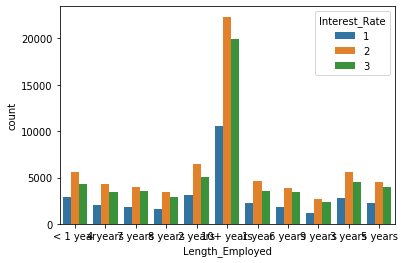

In [157]:
# checkig the Interest_Rate distribution
sns.countplot('Length_Employed',hue='Interest_Rate',data=train_data)

train_data['Length_Employed'].value_counts()

In [158]:
train_data['Length_Employed']=train_data['Length_Employed'].fillna(0)

test_data['Length_Employed']=test_data['Length_Employed'].fillna(0)

In [159]:
train_data['Length_Employed']=train_data['Length_Employed'].replace(['10+ years','9 years','8 years','7 years',
                                                                       '6 years','5 years','4 years','3 years',
                                                                       '2 years','1 year','< 1 year'],[11,9,8,7,6,5,4,3,2,1,0])

test_data['Length_Employed']=test_data['Length_Employed'].replace(['10+ years','9 years','8 years','7 years',
                                                                       '6 years','5 years','4 years','3 years',
                                                                       '2 years','1 year','< 1 year'],[11,9,8,7,6,5,4,3,2,1,0])

Mortgage    70345
Rent        56031
Own         12525
Other          49
None           10
Name: Home_Owner, dtype: int64

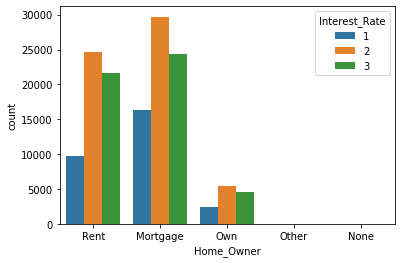

In [160]:
# checkig the Interest_Rate distribution
sns.countplot('Home_Owner',hue='Interest_Rate',data=train_data)

train_data['Home_Owner'].value_counts()

In [161]:
# filling missing with forward filling
train_data['Home_Owner']=train_data['Home_Owner'].fillna(method = 'ffill')

test_data['Home_Owner']=test_data['Home_Owner'].fillna(method = 'ffill')

In [162]:
#encoding of home Owner column
train_data['Home_Owner']=train_data['Home_Owner'].replace(['None','Rent','Own','Other','Mortgage'],[1,2,3,4,5])

test_data['Home_Owner']=test_data['Home_Owner'].replace(['None','Rent','Own','Other','Mortgage'],[1,2,3,4,5])

In [163]:
train_data.groupby('Interest_Rate')['Annual_Income'].mean()

Interest_Rate
1    81295.256362
2    71179.185595
3    71371.981313
Name: Annual_Income, dtype: float64

In [164]:
# filling missing value with mean()
train_data['Annual_Income']=train_data['Annual_Income'].fillna(train_data['Annual_Income'].mean())

test_data['Annual_Income']=test_data['Annual_Income'].fillna(train_data['Annual_Income'].mean())

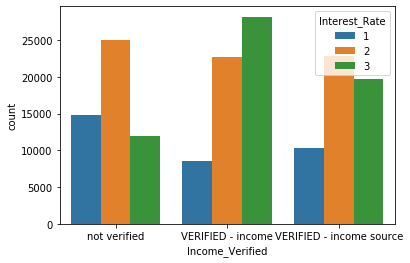

In [165]:
# visuliztion of Income_Verified
sns.countplot('Income_Verified',hue='Interest_Rate',data=train_data)

In [166]:
train_data['Income_Verified'].value_counts()

VERIFIED - income           59421
VERIFIED - income source    53015
not verified                51873
Name: Income_Verified, dtype: int64

In [167]:
# encoding of 'Income_Verified'

train_data['Income_Verified']=train_data['Income_Verified'].replace(['VERIFIED - income','VERIFIED - income source',
                                                                    'not verified'],[3,2,1])

test_data['Income_Verified']=test_data['Income_Verified'].replace(['VERIFIED - income','VERIFIED - income source',
                                                                    'not verified'],[3,2,1])

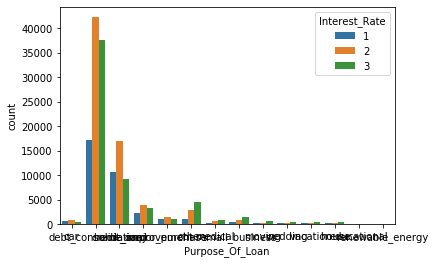

In [168]:
sns.countplot('Purpose_Of_Loan',hue='Interest_Rate',data=train_data)

In [169]:
train_data['Purpose_Of_Loan'].value_counts()

debt_consolidation    97101
credit_card           36684
home_improvement       9269
other                  8346
major_purchase         3435
small_business         2392
car                    1885
medical                1541
moving                  974
vacation                837
wedding                 828
house                   773
renewable_energy        123
educational             121
Name: Purpose_Of_Loan, dtype: int64

In [170]:
train_data['Purpose_Of_Loan']=train_data['Purpose_Of_Loan'].replace(['moving','small_business','other','renewable_energy',
                                                                    'house','vacation','medical','wedding','debt_consolidation',
                                                                    'home_improvement','major_purchase','credit_card',
                                                                    'educational','car'],[14,13,12,11,10,9,8,7,6,5,4,3,2,1])

test_data['Purpose_Of_Loan']=test_data['Purpose_Of_Loan'].replace(['moving','small_business','other','renewable_energy',
                                                                    'house','vacation','medical','wedding','debt_consolidation',
                                                                    'home_improvement','major_purchase','credit_card',
                                                                    'educational','car'],[14,13,12,11,10,9,8,7,6,5,4,3,2,1])

In [171]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164309 entries, 0 to 164308
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Loan_ID                  164309 non-null  int64  
 1   Loan_Amount_Requested    164309 non-null  int32  
 2   Length_Employed          164309 non-null  int64  
 3   Home_Owner               164309 non-null  int64  
 4   Annual_Income            164309 non-null  float64
 5   Income_Verified          164309 non-null  int64  
 6   Purpose_Of_Loan          164309 non-null  int64  
 7   Debt_To_Income           164309 non-null  float64
 8   Inquiries_Last_6Mo       164309 non-null  int64  
 9   Months_Since_Deliquency  75930 non-null   float64
 10  Number_Open_Accounts     164309 non-null  int64  
 11  Total_Accounts           164309 non-null  int64  
 12  Gender                   164309 non-null  object 
 13  Interest_Rate            164309 non-null  int64  
dtypes: f

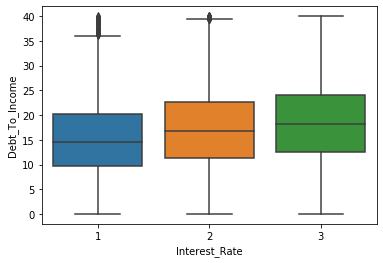

In [172]:
sns.boxplot(y='Debt_To_Income',x='Interest_Rate',data=train_data)

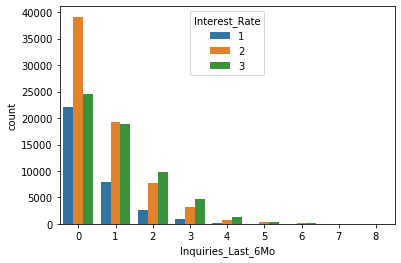

In [173]:
sns.countplot('Inquiries_Last_6Mo',hue='Interest_Rate',data=train_data)

In [174]:
# missing value of  'Months_Since_Deliquency'
train_data.loc[train_data['Months_Since_Deliquency']==0]['Interest_Rate'].value_counts()

2    147
1     97
3     75
Name: Interest_Rate, dtype: int64

In [175]:
train_data['Months_Since_Deliquency']=train_data['Months_Since_Deliquency'].fillna(0)

test_data['Months_Since_Deliquency']=test_data['Months_Since_Deliquency'].fillna(0)

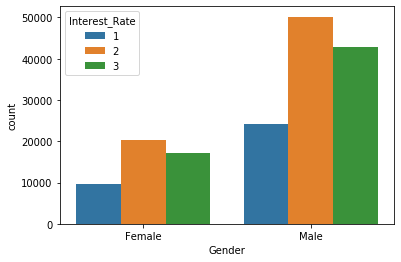

In [176]:
# visuliztion of Income_Verified
sns.countplot('Gender',hue='Interest_Rate',data=train_data)

In [177]:
train_data.loc[train_data['Gender']=='Male']['Interest_Rate'].value_counts()

2    50165
3    42874
1    24137
Name: Interest_Rate, dtype: int64

In [178]:
train_data['Gender']=train_data['Gender'].replace(['Male','Female'],[2,1])

test_data['Gender']=test_data['Gender'].replace(['Male','Female'],[2,1])

In [179]:
# drop Loan_id column
train_data=train_data.drop(columns=['Loan_ID'])

# drop Loan_id column
test_data1=test_data.drop(columns=['Loan_ID'])

In [186]:
y=train_data.loc[:,'Interest_Rate']
x=train_data.drop(columns=['Interest_Rate'])

In [187]:
#split data into train test by sample size .2
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [188]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators =100,max_depth=20, min_samples_split=5)
classifier.fit(x,y)
pred1=classifier.predict(X_test)
print(confusion_matrix(y_test, pred1))
print(f1_score(y_test,pred1,average='weighted'))

[[ 5405   950   414]
 [   34 13691   384]
 [   82   696 11206]]
0.9211414686702468


In [149]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0,max_depth=10, min_samples_split=7)
clf.fit(X_train,y_train)
pred1=clf.predict(X_test)
print(confusion_matrix(y_test, pred1))
print(f1_score(y_test,pred1,average='weighted'))

[[1697 4095 1082]
 [1354 8678 4055]
 [ 404 4986 6511]]
0.5026187974707971


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc= GradientBoostingClassifier(random_state=0,n_estimators=1000)
gbc.fit(X_train,y_train)
pred1=gbc.predict(X_test)
print(confusion_matrix(y_test, pred1))
print(f1_score(y_test,pred1,average='weighted'))

In [189]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(n_estimator=100,learning_rate=0.2)
xgb_model.fit(x,y)
pred1=xgb_model.predict(X_test)
print(confusion_matrix(y_test, pred1))
print(f1_score(y_test,pred1,average='weighted'))

[[2075 3862  832]
 [1081 9509 3519]
 [ 287 4291 7406]]
0.5682315169984845


In [190]:
from lightgbm import LGBMClassifier
lgb= LGBMClassifier(n_estimators=100,learning_rate=0.2)
lgb.fit(x,y)
pred1=lgb.predict(X_test)
print(confusion_matrix(y_test, pred1))
print(f1_score(y_test,pred1,average='weighted'))

[[2030 3872  867]
 [1132 9372 3605]
 [ 297 4345 7342]]
0.560662265874359


In [191]:
from sklearn.ensemble import VotingClassifier
estim=[('lgb',lgb),('xgb',xgb_model),('classifier',classifier)]
vt=VotingClassifier(estimators=estim,voting="soft",weights=[3,2,1])
vt.fit(x,y)
pred1=vt.predict(X_test)
print(confusion_matrix(y_test, pred1))
print(f1_score(y_test,pred1,average='weighted'))

[[ 2430  3488   851]
 [  730 10498  2881]
 [  273  3593  8118]]
0.6310222442544947


In [200]:
#submission file by lgb classifer
pred=lgb.predict(test_data1)
pred_sub=pd.DataFrame(pred,columns=["Interest_Rate"])
final_data=pd.DataFrame(pd.concat([test_data.iloc[:,0],pred_sub],axis=1))
final_data.to_csv(r'C:\Users\User\Downloads\Machine Learning for Banking.csv',index=False) 

In [201]:
final_data

,Loan_ID,Interest_Rate
0,10164310,2
1,10164311,1
2,10164312,3
3,10164313,2
4,10164314,2
...,...,...
109536,10273846,3
109537,10273847,2
109538,10273848,2
109539,10273849,3
